# Explore the dataset

Our ‘train’ folder contains 43 folders each representing a different class. The range of the folder is from 0 to 42. With the help of the OS module, we iterate over all the classes and append images and their respective labels in the data and labels list.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dense, Flatten, Dropout
#os.chdir('/home/yassine/Bureau/Project/Traffic sign classification')

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)



Finally, we have stored all the images and their labels into lists (data and labels). 

the shape of data is (39209, 30,30,3) which that they are 39209 image of 30 by 3à pixels and the 3 means the data containd color image RGB

In [4]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


split data  for training and testing with sklearn and we use to_categoerl form Keras.utils for conertong y_train, y_test to on_hot_encoding

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
X_train.shape[:1]

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


(31367,)

# Step 2: Build a CNN model

In [6]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu' ))
model.add(Conv2D(filters = 64, kernel_size = (3 ,3), activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))
# compilation the model


In [6]:
# compilation the model

We compile our model with adam Optimazer which perfomrs and loss is categorical_crossentropy” because we have multiple classes to categorise. 

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step3 : train and validate the model 

After building the model architecture, we then train the model using model.fit(). I tried with batch size 32 and 64. Our model performed better with 64 batch size. And after 15 epochs the accuracy was stable.

In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size= 32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 162s 165ms/step - loss: 2.2492 - accuracy: 0.4150 - val_loss: 0.8112 - val_accuracy: 0.7715
Epoch 2/15
981/981 [==============================] - 173s 176ms/step - loss: 0.9876 - accuracy: 0.7074 - val_loss: 0.4166 - val_accuracy: 0.8863
Epoch 3/15
981/981 [==============================] - 156s 159ms/step - loss: 0.7231 - accuracy: 0.7821 - val_loss: 0.3386 - val_accuracy: 0.9004
Epoch 4/15
981/981 [==============================] - 136s 139ms/step - loss: 0.6359 - accuracy: 0.8070 - val_loss: 0.2674 - val_accuracy: 0.9217
Epoch 5/15
981/981 [==============================] - 137s 140ms/step - loss: 0.5456 - accuracy: 0.8350 - val_loss: 0.2020 - val_accuracy: 0.9444
Epoch 6/15
981/981 [==============================] - 138s 141ms/step - loss: 0.4710 - accuracy: 0.8572 - val_loss: 0.1733 - val_accuracy: 0.9517
Epoch 7/15
981/981 [==============================] - 159s 162ms/step - loss: 0.4210 - accuracy: 0.8745 - val_loss: 0.1505 -

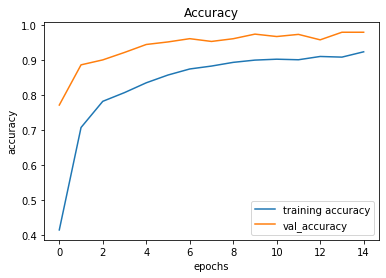

In [9]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


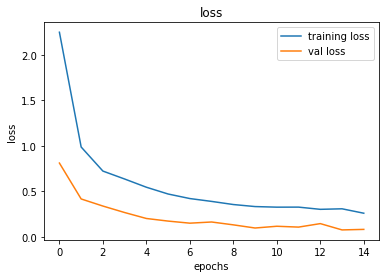

In [10]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Step 4: Test our model with test dataset

Our dataset contains a test folder and in a test.csv file, we have the details related to the image path and their respective class labels. We extract the image path and labels using pandas. Then to predict the model, we have to resize our images to 30×30 pixels and make a numpy array containing all image data. From the sklearn.metrics, we imported the accuracy_score and observed how our model predicted the actual labels. We achieved a 95% accuracy in this model.

In [11]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')

In [12]:
labels = y_test['ClassId'].values
imgs = y_test["Path"].values
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
pred = model.predict_classes(X_test)

    


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [13]:
accuracy_score(labels, pred)

0.9292161520190024

In the end, we are going to save the model that we have trained using the Keras model.save() function

In [14]:
model.save('traffic_classifier.h5')

In [15]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_image(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image, Y_pred


trafic reconsion is  :  Speed limit (80km/h)


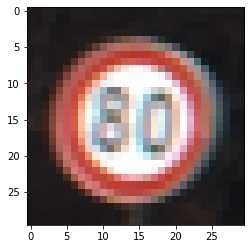

In [25]:
plot, prediction = test_on_image('/home/yassine/Bureau/Project/Traffic sign classification/test/00213.png')
s = [str(i) for  i in prediction]
a = int("".join(s))
print('trafic reconsion is  : ', classes[a])
plt.imshow(plot)
plt.show()